In [80]:
import pandas as pd
import seaborn as sns
sns.set()
import pylab
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
%matplotlib inline

In [16]:
df = pd.read_csv('yoga_visits.csv')

# Testing for multicollinearity

In [37]:
X_df = df.loc[:, df.columns != 'visits']
for i in range(len(X_df.columns)):
    print(df.columns[i], variance_inflation_factor(X_df.values, i))

minutes per class 1090.448669207542
poses per classs 1114.750654339687
studio rating 5.248689487349638
yoga type 2.404918303016848
logo colors 3.0930211693766987
cost per class 24.85582269081937
lobby plants 3.6290214626335913
average temperature 8.806278644714666
monthly rent 40.38043345601704
average teacher age 65.90206132207182
hours of operation 40.137625553949995
near bus stop 1.9503227232188325


minutes per class and poses per class have an extremely high variance inflation factor. This makes sense, because the more minutes there are in the class, the more poses there will be in the class

# Train/test split (with scaling)

In [38]:
X = X_df.values
y = df['visits'].values.reshape(-1, 1)

In [46]:
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_Y.fit_transform(y)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled)

# Ordinary linear regression

In [47]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("training r^2", lr.score(X_train, y_train))
print("testing r^2", lr.score(X_test, y_test))

training r^2 0.8082393536343111
testing r^2 0.7607636212804816


# Ridge regression

In [48]:
rr = Ridge()
rr.fit(X_train_scaled, y_train_scaled)
print("training r^2", rr.score(X_train_scaled, y_train_scaled))
print("testing r^2", rr.score(X_test_scaled, y_test_scaled))

training r^2 0.8050628035388548
testing r^2 0.7736968643449567


# Lasso regression

In [49]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train_scaled)
print("training r^2", lasso.score(X_train_scaled, y_train_scaled))
print("testing r^2", lasso.score(X_test_scaled, y_test_scaled))

training r^2 0.7637476215233994
testing r^2 0.7686989409408157


# Elastic net regression

In [50]:
enet = ElasticNet(alpha=0.1)
enet.fit(X_train_scaled, y_train_scaled)
print("training r^2", enet.score(X_train_scaled, y_train_scaled))
print("testing r^2", enet.score(X_test_scaled, y_test_scaled))

training r^2 0.7852034727527579
testing r^2 0.7816196613917226


# Comparison of coefficients

In [51]:
lr.coef_.sum()

8.15242177681603

In [52]:
rr.coef_.sum()

1.1219559840895488

In [53]:
lasso.coef_.sum()

0.9123385121982213

In [54]:
enet.coef_.sum()

0.943111904380828

Lasso has the lowest sum of coefficients

# Barplot of coefficients

In [70]:
lasso_coef_df = pd.DataFrame({'feature' : X_df.columns, 'coefficient' : lasso.coef_})
lasso_coef_df['regression'] = 'lasso'
lasso_coef_df

feature  coefficient regression
0     minutes per class     0.000000      lasso
1      poses per classs     0.536048      lasso
2         studio rating     0.441621      lasso
3             yoga type     0.000000      lasso
4           logo colors    -0.000000      lasso
5        cost per class    -0.065331      lasso
6          lobby plants     0.000000      lasso
7   average temperature    -0.000000      lasso
8          monthly rent    -0.000000      lasso
9   average teacher age    -0.000000      lasso
10   hours of operation     0.000000      lasso
11        near bus stop    -0.000000      lasso

In [71]:
lr_coef_df = pd.DataFrame({'feature' : X_df.columns, 'coefficient' : lr.coef_[0]})
lr_coef_df['regression'] = 'linear regression'

In [72]:
rr_coef_df = pd.DataFrame({'feature' : X_df.columns, 'coefficient' : rr.coef_[0]})
rr_coef_df['regression'] = 'ridge'

In [73]:
enet_coef_df = pd.DataFrame({'feature' : X_df.columns, 'coefficient' : enet.coef_[0]})
enet_coef_df['regression'] = 'elastic net'

In [74]:
coefs_df = pd.concat([lr_coef_df, rr_coef_df, enet_coef_df, lasso_coef_df])
coefs_df

feature  coefficient         regression
0     minutes per class    -0.328635  linear regression
1      poses per classs     2.140352  linear regression
2         studio rating     6.045669  linear regression
3             yoga type    -0.536369  linear regression
4           logo colors     0.043361  linear regression
5        cost per class    -0.285729  linear regression
6          lobby plants     0.026575  linear regression
7   average temperature     0.017246  linear regression
8          monthly rent     0.000735  linear regression
9   average teacher age     0.244519  linear regression
10   hours of operation     0.983247  linear regression
11        near bus stop    -0.198550  linear regression
0     minutes per class     0.185768              ridge
1      poses per classs     0.432130              ridge
2         studio rating     0.523922              ridge
3             yoga type     0.037790              ridge
4           logo colors    -0.031022              ridge
5        cost per class    -0.158606              ridge
6          lobby plants     0.065553              ridge
7   average temperature     0.012158              ridge
8          monthly rent     0.010528              ridge
9   average teacher age    -0.008419              ridge
10   hours of operation     0.076138              ridge
11        near bus stop    -0.023984              ridge
0     minutes per class     0.198459        elastic net
1      poses per classs     0.198459        elastic net
2         studio rating     0.198459        elastic net
3             yoga type     0.198459        elastic net
4           logo colors     0.198459        elastic net
5        cost per class     0.198459        elastic net
6          lobby plants     0.198459        elastic net
7   average temperature     0.198459        elastic net
8          monthly rent     0.198459        elastic net
9   average teacher age     0.198459        elastic net
10   hours of operation     0.198459        elastic net
11        near bus stop     0.198459        elastic net
0     minutes per class     0.000000              lasso
1      poses per classs     0.536048              lasso
2         studio rating     0.441621              lasso
3             yoga type     0.000000              lasso
4           logo colors    -0.000000              lasso
5        cost per class    -0.065331              lasso
6          lobby plants     0.000000              lasso
7   average temperature    -0.000000              lasso
8          monthly rent    -0.000000              lasso
9   average teacher age    -0.000000              lasso
10   hours of operation     0.000000              lasso
11        near bus stop    -0.000000              lasso

<AxesSubplot:xlabel='feature', ylabel='coefficient'>

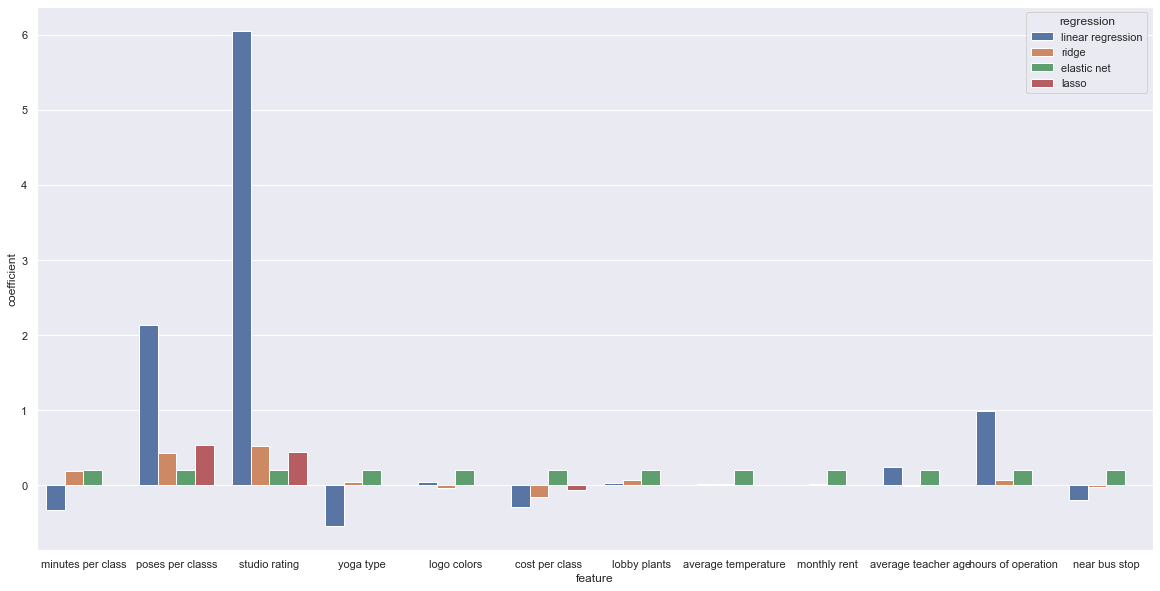

In [81]:
pylab.figure(figsize=(20, 10))
sns.barplot(x='feature', y='coefficient', hue='regression', data=coefs_df)

# Lasso coefficient deep dive

In [82]:
lasso_coef_df[lasso_coef_df['coefficient'] != 0]

feature  coefficient regression
1  poses per classs     0.536048      lasso
2     studio rating     0.441621      lasso
5    cost per class    -0.065331      lasso

poses per class, studio rating, and cost per class are non-zero. Hours of operation is also non-zero, although it's very small.